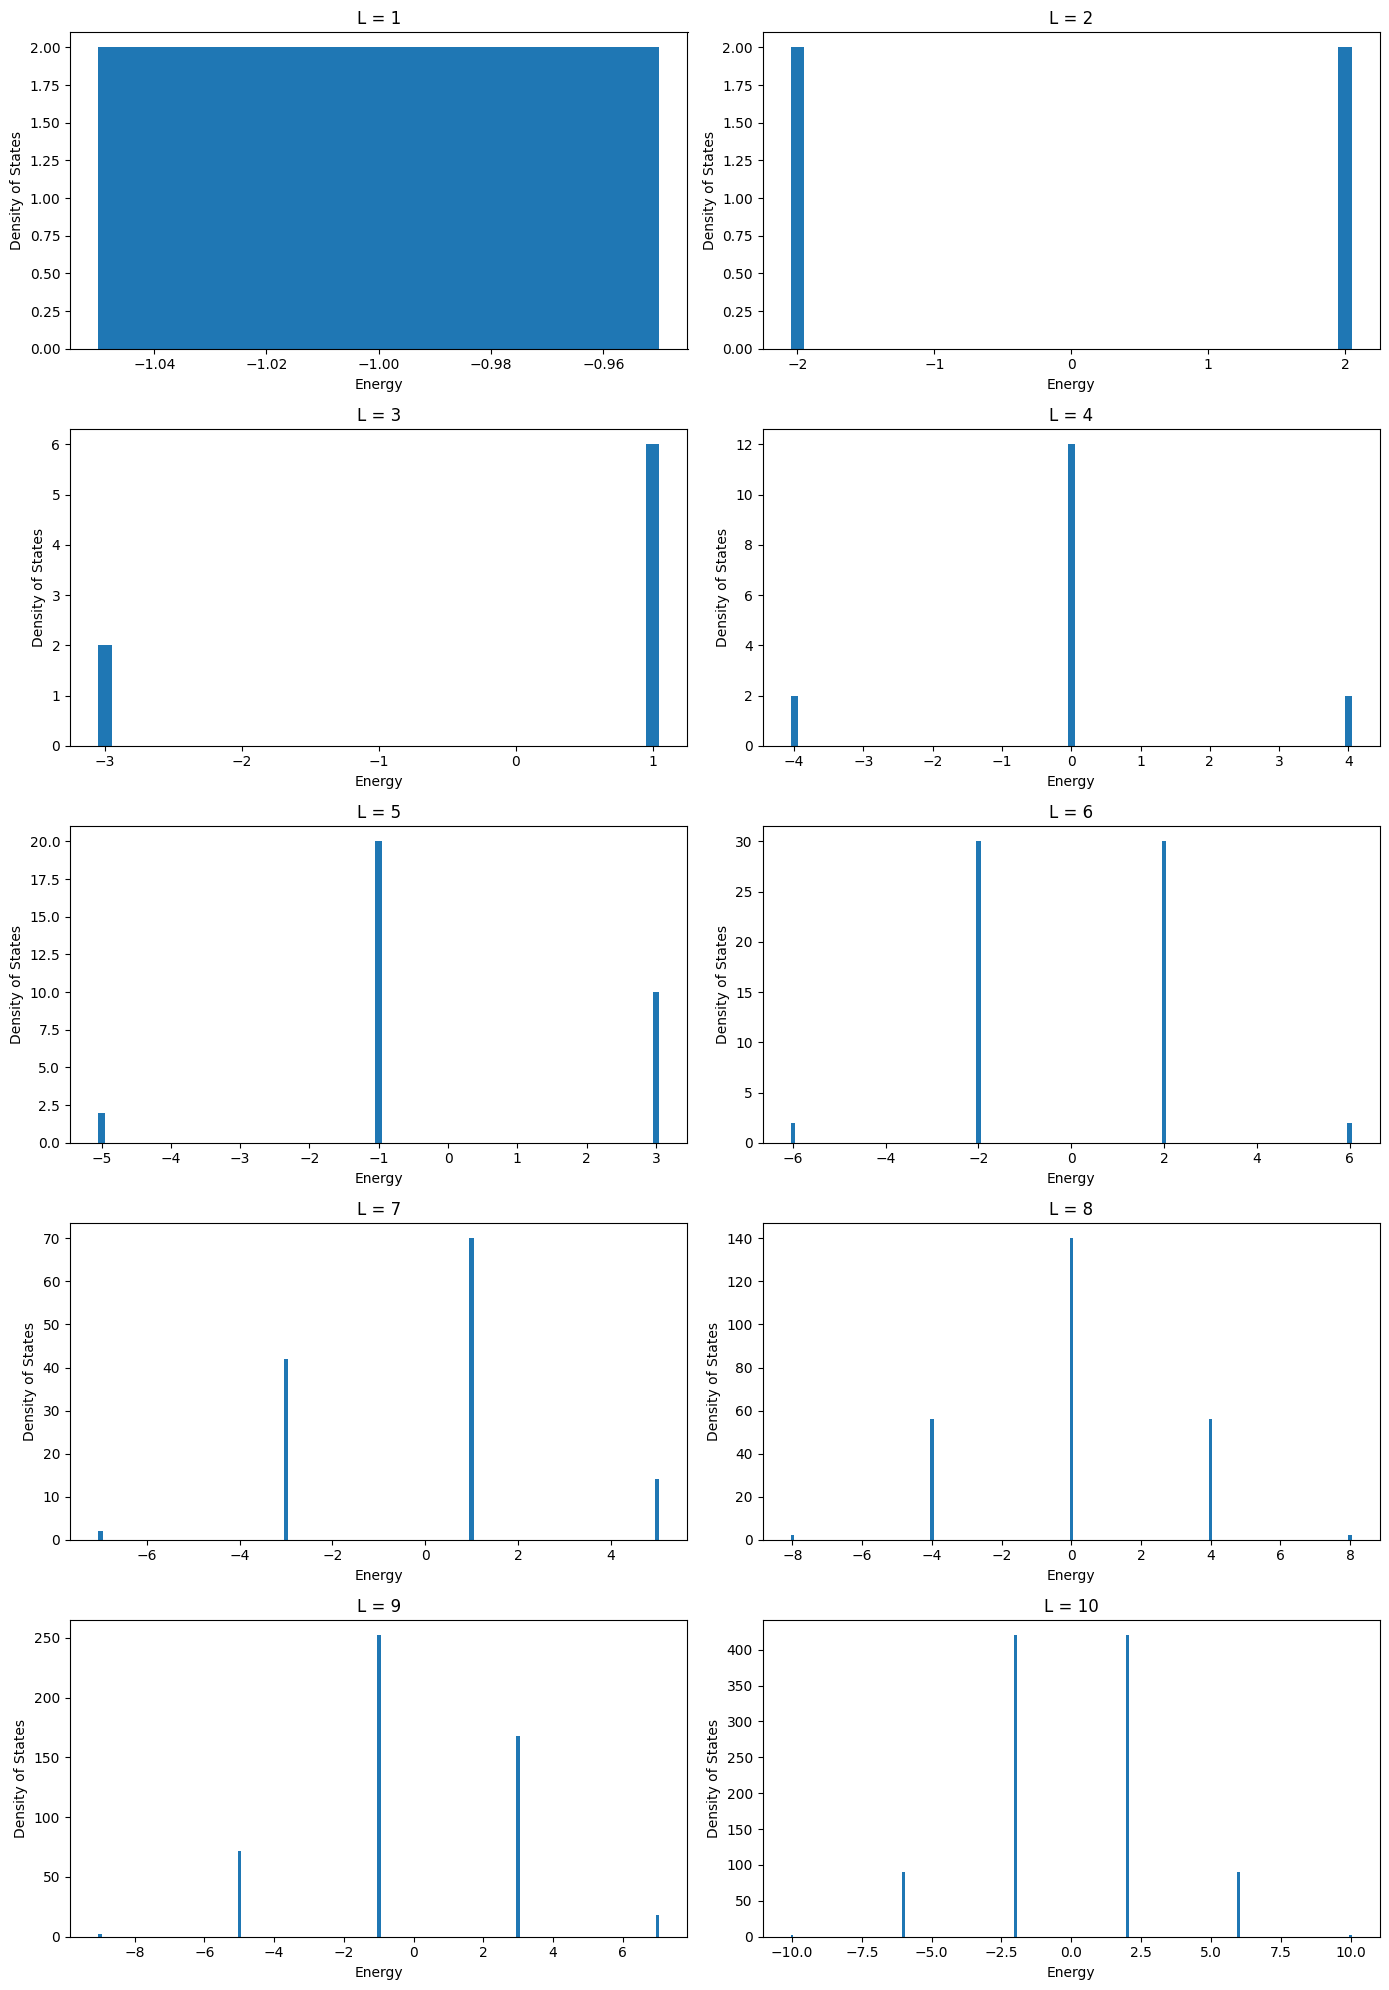

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

def ising_1d_energy(config, J=1):
    """Calculate the energy of a 1D Ising model configuration with periodic boundary conditions."""
    L = len(config)
    energy = -J * sum(config[i] * config[(i+1) % L] for i in range(L))
    return energy

def density_of_states(L):
    """Compute the density of states for a 1D Ising model of size L."""
    # Generate all possible spin configurations
    configurations = product([-1, 1], repeat=L)
    
    # Calculate the energy for each configuration
    energies = [ising_1d_energy(config) for config in configurations]
    
    # Count the occurrences of each energy value
    energy_counts = {}
    for energy in energies:
        if energy in energy_counts:
            energy_counts[energy] += 1
        else:
            energy_counts[energy] = 1
    
    return energy_counts

# Plotting the density of states for each L up to 10
fig, axes = plt.subplots(5, 2, figsize=(14, 20))
axes = axes.flatten()

for L in range(1, 11):
    dos = density_of_states(L)
    energies = list(dos.keys())
    counts = list(dos.values())
    
    axes[L-1].bar(energies, counts, width=0.1)
    axes[L-1].set_title(f'L = {L}')
    axes[L-1].set_xlabel('Energy')
    axes[L-1].set_ylabel('Density of States')
    
plt.tight_layout()
plt.show()
